## 개요 ##


- 자연어 데이터 수집 및 전처리.
- 자연어 처리를 통한 시 분류 인공지능 모델을 제작한다.
- 백석과 김수영의 시를 **‘자연어 처리’**하고 **나이브 베이지안 알고리즘**


## 알고리즘 설명 ##


- 지도 학습 분류(Classification)와 관련한 논문, 서적, 인터넷 자료를 보면 다양한 알고리즘이 나오는데, 그중에도 언급이 잘 되지 않는 분류 알고리즘이 바로 나이브 베이지안(Naive Bayes)이다.
- 나이브 베이지안 알고리즘이 많이 사용되는 분야가 바로 ‘자연어 처리’이다. -\
- 컴퓨터에서 사용하는 프로그래밍 언어와 구분하기 위해 인간이 일상생활에서 의사소통을 위해 사용하는 언어를 ‘자연어’라고 하고 컴퓨터를 활용하여 자연어를 분석하고 활용하는 것을 ‘자연어 처리(Natural Language Processing)’, 줄여서 ‘NLP’라고 한다.


## 나이브 베이지안 ##


- 나이브 베이지안 알고리즘은 베이즈 정리(Bayes’ theorem)에 기반한 분류 알고리즘으로, 베이즈 정리를 알기 위해서는 조건부 확률을 알아야 한다.
- 조건부 확률은 어떤 사건이 일어나는 경우에 다른 사건이 일어날 확률을 말한다.
- 즉, P(B|A)는 A와 B가 동시에 일어날 확률을 A가 일어날 확률로 나눈 것이고, 이러한 베이즈 정리를 곱셈 공식으로 변형한 것이 나이브 베이지안 알고리즘의 식이다.


## 나이브 베이지안 예시 ##


- 나이브 베이지안 알고리즘을 쉽게 이해하기 위해 토익 문제들을 학습하여 정답 분류 인공지능을 만든다고 가정한다.
- 먼저 다음 보기에 ‘probably’가 있는 10개의 문제만으로 머신러닝을 학습시킬 것이다.


 - 10개의 문제 중 'probably'가 정답일 확률: 7/10=0.7 - P(정답)
 - 10개의 문제 중 옳은 것을 물어볼 확률: 8/10=0.8 - P(옳은)
 - 10개의 문제 중 옳은 것을 물어보고, 'probably'가 정답일 확률: 7/8=0.875 - P(옳은|정답)


- 이제 ‘probably’가 보기에 있고 옳은 것을 물어보는 문제 중 ‘probably’가 정답일 조건부 확률.


- 위 예제를 대입하면 P(정답|옳은)=P(옳은|정답)×P(정답)/P(옳은)이고 0.875×
0.7/0.8=약 0.766이다.
- 위 가정을 토대로 하면 옳은 것을 물어보는 토익 문제에서 ‘probably’가 보기에 있으면 76.6%의 확률로 정답.


- 토익 한 문제에 나온 단어는 많지만 각각 단어의 빈도수는 적다.


- 위 예시의 ‘probably’처럼 열 번의 빈도수만으로도 확률을 구할 수 있다.
- 이것은 적은 데이터로도 머신러닝 학습이 가능하다는 뜻이다.
- 적은 데이터로도 ‘단순화’ 시켜서 쉽고 빠르게 판단을 내리는 특징이 있어 나이브 베이지안 알고리즘은 자연어 처리에 적합하다.


In [89]:
# 라이브러리 버전을 맞추기 위한 업데이트
# %%bash
# apt-get update
# apt-get install g++ openjdk-8-jdk python-dev python3-dev
# pip3 install JPype1
# pip3 install konlpy

# 셀레니움 실행시 크롬 브라우저 블러킹을 우회할수 있도록 세팅 
from selenium import webdriver 



In [90]:
# import sys

# !sudo add-apt-repository ppa:saiarcot895/chromium-beta
# !sudo apt remove chromium-browser
# !sudo snap remove chromium
# !sudo apt install chromium-browser


# !pip3 install selenium
# !apt-get update
# !apt install chromium-chromedriver
# !cp /usr/lib/chromium-browser/chromedriver /usr/bin/

#  구글식 형태 


In [91]:
# 필요 라이브러리 로드


import pandas as pd  # 데이터 처리를 위한 라이브러리, 데이터프레임 생성 및 조작
import tensorflow as tf  # 딥러닝 모델 구축 및 학습을 위한 라이브러리
import numpy as np  # 수치 연산을 위한 라이브러리, 배열 및 행렬 연산
import matplotlib  # 데이터 시각화를 위한 라이브러리 (기본 설정)
import matplotlib.pyplot as plt  # 데이터 시각화를 위한 플롯팅 라이브러리
import konlpy  # 한국어 자연어 처리를 위한 라이브러리
from konlpy.tag import Okt  # 형태소 분석기, 한국어 텍스트 전처리에 사용
import tqdm  # 코드 진행 상황을 시각적으로 표시
from tqdm import tqdm  # 진행 상황 표시를 위한 프로그레스 바 제공
from tensorflow.keras.preprocessing.text import (
    Tokenizer,
)  # 텍스트 데이터 토크나이징을 위한 유틸리티
import time  # 시간 관련 작업 (수행 시간 측정 등)
from tqdm import tnrange  # 반복문에서 진행 상황 표시 (tqdm 변형)
from urllib.request import urlopen  # 웹 데이터 요청 및 다운로드
import requests  # HTTP 요청을 보내고 웹 데이터를 가져오는 라이브러리
import urllib.request  # URL을 열거나 파일 다운로드를 위한 유틸리티


In [92]:
# 데이터 로드
# 백석의 시와 김수영의 시를 모아둔 데이터를 불러온다


soo = pd.read_csv(
    "poet_soo.csv", delimiter=",", encoding="cp949"
)  # 김수영 시 데이터프레임 로드 : 한글 데이터 인코딩 cp949
baek = pd.read_csv(
    "poet_baek.csv", delimiter=",", encoding="cp949"
)  # 백석 시 데이터프레임 로드

print(soo.head())
print(baek.head())


                                             content
0  남묘(南廟) 문고리 굳은 쇠 문고리\n\n기어코 바람이 열고\n\n열사흘 달빛은\n...
1  백화(白花)의 의장(意匠)\n\n만화(萬華)의 거동의\n\n지금 고오히 잠드는 얼을...
2  꽃이 열매의 상부에 피었을 때\n\n너는 줄넘기 작란(作亂)을 한다\n\n \n\n...
3  가까이 할 수 없는 서적이 있다\n\n이것은 먼 바다를 건너온\n\n용이하게 찾아갈...
4  흘러가는 물결처럼\n\n지나인(支那人)의 의복\n\n나는 또 하나의 해협을 찾았던 ...
                                             content
0  가난한 내가\n아름다운 나타샤를 사랑해서\n오늘밤은 푹푹 눈이 나린다\n\n나타샤를...
1  당콩밥에 가지 냉국의 저녁을 먹고 나서\n바가지꽃 하이얀 지붕에 박각시 주락시 붕붕...
2  여승은 합장하고 절을 했다\n가지취의 내음새가 났다\n쓸쓸한 낯이 녯날같이 늙었다\...
3  가무락조개 난 뒷간거리에\n빚을 얻으려 나는 왔다\n빚이 안 되어 가는 탓에\n가무...
4  눈이 많이 와서\n산엣새가 벌로 나려 멕이고\n눈구덩이에 토끼가 더러 빠지기도 하면...


In [93]:
soo_new = soo["content"]  # 김수영의 시 내용만 호출
soo_new.reset_index(drop=True, inplace=True)  # 행 번호(인덱스) 초기화하고, 빈 칸 없애기
soo_new = soo_new.str.replace(
    "[^ㄱ-ㅎㅏ-ㅣ가-힣 ]", " "
)  # 정규식으로 표현(한글만 남기고 필요없는 기호들 삭제)


baek_new = baek["content"]  # 백석의 시 내용만 가져오기
baek_new.reset_index(
    drop=True, inplace=True
)  # 행 번호(인덱스) 초기화하고, 빈 칸 없애기
baek_new = baek_new.str.replace(
    "[^ㄱ-ㅎㅏ-ㅣ가-힣 ]", " "
)  # 정규식으로 표현(한글만 남기고 필요없는 기호들 삭제)


In [94]:
# 문자열 길이 계산 
for i in range(15): # 15개 확인
    print(i, ":길이:", len(soo_new[i]))

0 :길이: 229
1 :길이: 180
2 :길이: 222
3 :길이: 426
4 :길이: 261
5 :길이: 367
6 :길이: 383
7 :길이: 418
8 :길이: 458
9 :길이: 311
10 :길이: 804
11 :길이: 2735
12 :길이: 409
13 :길이: 951
14 :길이: 492


In [95]:
# 11번 시는 글자 수가 2409자나 된다.
# 글자 수가 많은 시를 웹 크롤링할 경우 오류가 발생하기 때문에, 안정적으로 400자 정도마다 시를 나눠 줘야 오류 없이 웹 크롤링이 가능하다.
# 250 글자로 쪼개줌 

import math


# Divide long poems and save to a new list
soo_divided = []
for poem in soo_new:
    if len(poem) > 250:
        num_segments = math.ceil(len(poem) / 250)
        for i in range(num_segments):
            segment = poem[i * 250 : (i + 1) * 250]
            soo_divided.append(segment)
    else:
        soo_divided.append(poem)


# Divide long poems and save to a new list
baek_divided = []
for poem in baek_new:
    if len(poem) > 250:
        num_segments = math.ceil(len(poem) / 250)
        for i in range(num_segments):
            segment = poem[i * 250 : (i + 1) * 250]
            baek_divided.append(segment)
    else:
        baek_divided.append(poem)


In [96]:
for i in range(15):  # 15개 확인
    print(i, ":길이:", len(soo_divided[i]))


0 :길이: 229
1 :길이: 180
2 :길이: 222
3 :길이: 250
4 :길이: 176
5 :길이: 250
6 :길이: 11
7 :길이: 250
8 :길이: 117
9 :길이: 250
10 :길이: 133
11 :길이: 250
12 :길이: 168
13 :길이: 250
14 :길이: 208


In [97]:
# # - 시인은 개성이 드러나는 각자의 문체가 있다.

import sys
# # - 백석의 시나 김수영의 시 속에 들어 있는 각자의 문체와 방언들을 표준어로 바꿔 그 결과를 원래 있던 시 데이터와 합친다.
# # - 시를 표준어로 바꾸는 방법은 번역기(여기서는 네이버 ‘파파고’를 사용)를 활용해 영어로 번역한 후 다시 한글로 번역하는 것이다.
# # - 이를 위해서는 코랩과 웹을 연결해야 한다.

##Selenium 관련 환경 설정
# import time
# import selenium
# from selenium import webdriver as driver
# from selenium.webdriver.common.by import By
# from selenium.webdriver.chrome.service import Service
# from selenium.webdriver.support import expected_conditions as EC


# # 인터넷 창이 안 뜨고 웹과 연결,
# options = webdriver.ChromeOptions()


# # 웹과 코랩 연동을 수월하게 하기 위해 보안을 약하게 만드는 코드.
# options.add_argument("--headless")
# options.add_argument("--no-sandbox")


# # 공유 메모리를 \dev\shm 디렉터리를 사용하지 않고 바로 연결.
# options.add_argument("disable-dev-shm-usage")

# webdriver_service = Service("C\WebDriver\chromedriver")
# driver = webdriver.Chrome(service=webdriver_service, options = options)


# 시인은 개성이 드러나는 각자의 문체가 있다.

# 백석의 시나 김수영의 시 속에 들어 있는 각자의 문체와 방언들을 표준어로 바꿔 그 결과를 원래 있던 시 데이터와 합친다.
# 시를 표준어로 바꾸는 방법은 번역기(여기서는 네이버 ‘파파고’를 사용)를 활용해 영어로 번역한 후 다시 한글로 번역하는 것이다.
# 이를 위해서는 코랩과 웹을 연결해야 한다.

#Selenium 관련 환경 설정
# 시인은 개성이 드러나는 각자의 문체가 있다.

# 백석의 시나 김수영의 시 속에 들어 있는 각자의 문체와 방언들을 표준어로 바꿔 그 결과를 원래 있던 시 데이터와 합친다.
# 시를 표준어로 바꾸는 방법은 번역기(여기서는 네이버 ‘파파고’를 사용)를 활용해 영어로 번역한 후 다시 한글로 번역하는 것이다.
# 이를 위해서는 코랩과 웹을 연결해야 한다.

##Selenium 관련 환경 설정
import time
import selenium
from selenium import webdriver
from selenium.webdriver.common.by import By
from selenium.webdriver.chrome.service import Service
from selenium.webdriver.chrome.options import Options

# 웹 크롤링(web crawling, 웹의 정보를 자동화된 방법으로 탐색하는 것)을 위한 크롬 드라이버 설정 코드이다.
chromedriver_path = "C:/WebDriver/chromedriver.exe"



# 인터넷 창이 안 뜨고 웹과 연결,
options = webdriver.ChromeOptions()

# 웹과 코랩 연동을 수월하게 하기 위해 보안을 약하게 만드는 코드.
options.add_argument("--headless")
options.add_argument("--no-sandbox")

# 공유 메모리를 \dev\shm 디렉터리를 사용하지 않고 바로 연결.
options.add_argument("disable-dev-shm-usage")

# 크롬 드라이버를 실행하면 코랩과 웹이 연결.
webdriver_service = Service(chromedriver_path)
driver = webdriver.Chrome(service=webdriver_service, options=options)


#  코랩 리눅스 ->  VScode 윈도우로 코드 변환함 


## 한자 및 영어, 일본어를 한국어로 변환 ##


- 미리 불러온 셀레늄(selenium) 모듈과 크롬 웹 드라이버를 이용해 준비한 시 파일을 네이버 파파고 번역기에 넣어 ‘한글 → 영어 → 한글’순으로 변환.
  - tqdm( )은 몇 % 진행되었는지, 얼마나 시간이 지났는지, 남았는지 등 반복문 진행률을 표시해 주어 긴 작업의 진행 상태를 표시.
  - 파파고 웹 주소에 번역할 언어와 글( https: //papago.naver.com/?sk=ko&tk=번역할 언어&st=번역할 글) 을 조합하면 코랩 내부에서 웹 크롤링으로 번역을 요청
  - find_element( ) 함수에 번역 결과 경로를 넣으면 번역된 데이터를 호출.
  - 원하는 리스트에 번역된 결과를 추가하는 함수: append( ).
  - 한글을 영어(kor_to_trans)로, 영어를 한글(trans_to_kor)로 번역.


In [98]:
def kor_to_trans(text_data, trans_lang):
    """trans_lang에 넣는 파라미터 값:
    'en' -> 영어
    'ja&hn=0' -> 일본어
    'zh-CN' -> 중국어(간체)"""
    for i in tqdm(range(len(text_data))):
        try:
            driver.get(
                "https://papago.naver.com/?sk=ko&tk="
                + trans_lang
                + "&st="
                + text_data[i]
            )
            # Wait for the translation to appear using explicit wait
            from selenium.webdriver.support.ui import WebDriverWait
            from selenium.webdriver.support import expected_conditions as EC

            WebDriverWait(driver, 10).until(
                EC.presence_of_element_located((By.XPATH, '//*[@id="txtTarget"]/span'))
            )
            backtrans = driver.find_element("xpath", '//*[@id="txtTarget"]/span').text
            trans_list.append(backtrans)
        except:
            driver.get("https://papago.naver.com/?sk=ko&tk=" + trans_lang)
            # Wait for the input field to be visible using explicit wait
            WebDriverWait(driver, 10).until(
                EC.presence_of_element_located((By.XPATH, '//*[@id="txtSource"]'))
            )
            driver.find_element("xpath", '//*[@id="txtSource"]').send_keys(text_data[i])
            # Wait for the translation to appear after input
            WebDriverWait(driver, 10).until(
                EC.presence_of_element_located((By.XPATH, '//*[@id="txtTarget"]/span'))
            )
            backtrans = driver.find_element("xpath", '//*[@id="txtTarget"]/span').text
            trans_list.append(backtrans)


def trans_to_kor(transed_list, transed_lang):
    for i in tqdm(range(len(transed_list))):
        try:
            driver.get(
                "https://papago.naver.com/?sk="
                + transed_lang
                + "&tk=ko&st="
                + transed_list[i]
            )
            # Wait for the translation to appear using explicit wait
            from selenium.webdriver.support.ui import WebDriverWait
            from selenium.webdriver.support import expected_conditions as EC

            WebDriverWait(driver, 10).until(
                EC.presence_of_element_located((By.XPATH, '//*[@id="txtTarget"]/span'))
            )
            backtrans = driver.find_element("xpath", '//*[@id="txtTarget"]/span').text
            backtrans_list.append(backtrans)
        except:
            driver.get("https://papago.naver.com/?sk=" + transed_lang + "&tk=ko")
            # Wait for the input field to be visible using explicit wait
            WebDriverWait(driver, 10).until(
                EC.presence_of_element_located((By.XPATH, '//*[@id="txtSource"]'))
            )
            driver.find_element("xpath", '//*[@id="txtSource"]').send_keys(
                transed_list[i]
            )
            # Wait for the translation to appear after input
            WebDriverWait(driver, 10).until(
                EC.presence_of_element_located((By.XPATH, '//*[@id="txtTarget"]/span'))
            )
            backtrans = driver.find_element("xpath", '//*[@id="txtTarget"]/span').text
            backtrans_list.append(backtrans)


In [99]:
# 한글을 영어로 번역한 후 담을 리스트(trains_list)와 영어를 한글로 번역한 후 담을 리스트
# (backtrans_list)를 선언한 후 위에서 만든 번역 함수로 실행.
# 그 후 데이터 처리를 위해 판다스 데이터 프레임을 만들고 원래 김수영의 시와 합친다.


trans_list = []  # 한국어->영어 를 담을 리스트
backtrans_list = []  # 영어->한국어 를 담을 리스트


kor_to_trans(soo_divided, "en")  # 한글 -> 영어
trans_to_kor(trans_list, "en")  # 영어 -> 한글
transed_list1 = pd.DataFrame(
    {"content": backtrans_list}
)  # 영어 -> 한글로 된 글을 데이터 프레임으로 만들기
soo = pd.concat(
    [soo, transed_list1], ignore_index=True
)  # 데이터 프레임으로 만든 번역 글을 원래 데이터와 합치기


100%|████████████████████████████████████████████████████████████████████████████████| 186/186 [04:08<00:00,  1.34s/it]


In [100]:
trans_list = []  # 한국어->영어 를 담을 리스트
backtrans_list = []  # 영어->한국어 를 담을 리스트

kor_to_trans(baek_divided, "en")  # 한글 -> 영어
trans_to_kor(trans_list, "en")  # 영어 -> 한글
transed_list = pd.DataFrame(
    {"content": backtrans_list}
)  # 영어 -> 한글로 된 글을 데이터 프레임으로 만들기
baek = pd.concat(
    [baek, transed_list], ignore_index=True
)  # 데이터 프레임으로 만든 번역 글을 원래 데이터와 합치기


100%|████████████████████████████████████████████████████████████████████████████████| 126/126 [02:57<00:00,  1.41s/it]


In [101]:
print(soo[0:2])
print(baek[0:2])


                                             content
0  남묘(南廟) 문고리 굳은 쇠 문고리\n\n기어코 바람이 열고\n\n열사흘 달빛은\n...
1  백화(白花)의 의장(意匠)\n\n만화(萬華)의 거동의\n\n지금 고오히 잠드는 얼을...
                                             content
0  가난한 내가\n아름다운 나타샤를 사랑해서\n오늘밤은 푹푹 눈이 나린다\n\n나타샤를...
1  당콩밥에 가지 냉국의 저녁을 먹고 나서\n바가지꽃 하이얀 지붕에 박각시 주락시 붕붕...


In [102]:
# 불러온 원본과 번역된 시 데이터를 전처리.
# 먼저 김수영의 시에는 ‘soo’, 백석의 시에는 ‘baek’이라는 라벨을 부여하고 하나의 파일(poetry)로 합친다.
soo["poet"] = "soo"
baek["poet"] = "baek"
poetry = pd.concat([soo, baek], ignore_index=True)


print(poetry.shape)


(458, 2)


In [103]:
poetry.describe()

,content,poet
count,458,458
unique,453,2
top,...,soo
freq,5,255


In [104]:
# 합친 시 데이터에 Null 값이 존재하면 행을 제거하고 잘 제거되었는지 확인한다.
# isnull( ) 함수는 Null 값이 존재하는지 확인해 주고 False가 나오면 Null 값이 존재하지 않는다는 의미이다.
# how : {'any' : 존재하면 제거 / 'all' : 모두 결측치면 제거} 제거할 유형. 포함만 시켜도 제거할지, 전무 NA여야 제거할지 지정.
poetry = poetry.dropna(how="any")  # Null 값이 존재하는 행 제거
print(poetry.isnull().values.any())  # Null 값이 존재하는지 확인


False


In [105]:
# 중복 데이터를 drop_duplicates( ) 함수로 없애 주면 시 데이터 전처리가 끝난다. 이제 개수를 확인.
poetry.drop_duplicates(subset=["content"], inplace=True)  # 똑같은 데이터 없애기


In [106]:
print(poetry.shape)


(453, 2)


453


<Axes: xlabel='poet'>

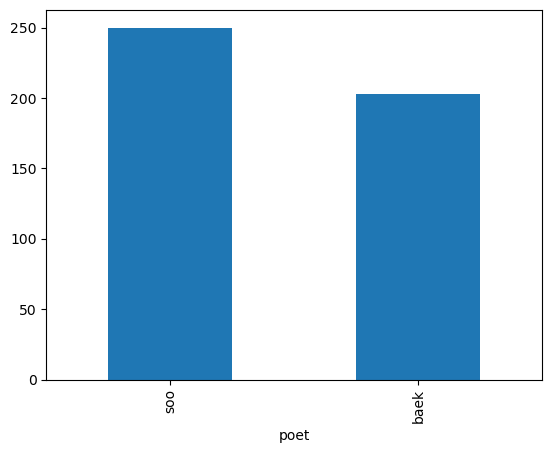

In [107]:
print(len(poetry))
poetry['poet'].value_counts().plot(kind='bar')

100%|████████████████████████████████████████████████████████████████████████████████| 453/453 [00:08<00:00, 56.25it/s]
C:\Users\3호실-09\AppData\Local\Temp\ipykernel_12036\2377189579.py:28: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  poetry["poet"] = poetry["poet"].replace(


<Axes: xlabel='poet'>

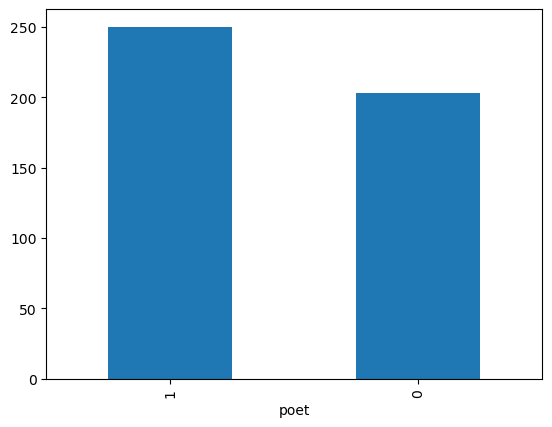

In [108]:
# 각 시인의 특성을 드러내지 못하고 일반적으로 쓰이는 표현인 ‘불용어’를 제거해야 한다.
# (부사격 조사인 ‘-쪽으로’, ‘-까지’와 같은 형식 형태소나 수를 표현하는 수사 등)


# 맨 처음 불러온 모듈 중 koNLPy에 ‘Okt’라는 형태소 분석기를 불러오고 한국어 불용어 리스트
# (https://raw.githubusercontent.com/yoonkt200/FastCampusDataset/master/korean_stopwords.txt)가 저장된 파일을 불러온다.


# 토큰화된 문장을 담을 리스트(tokenized_data)를 선언하고 시집(poetry)에 있는 시를 하나씩 불러와서 토큰화(okt.morphs(  ))를 한다.


# 더불어 한국어 불용어 리스트를 참고해 불용어를 제거하고 전처리된 시를 저장한다.
# 인공지능 분류를 위해 백석의 시는 0으로, 김수영의 시는 1로 라벨링을 해주고 잘되었는지 확인해 본다.
# 불용어 리스트 참조: https://gist.github.com/spikeekips/40eea22ef4a89f629abd87eed535ac6a


okt = Okt()  # 한국어 토큰화를 위한 Konlpy의 okt 객체 불러오기
stopwords = pd.read_csv(
    "https://raw.githubusercontent.com/yoonkt200/FastCampusDataset/master/korean_stopwords.txt"
).values.tolist()  # 한국어 불용어 리스트 불러오기
tokenized_data = []  # 토큰화된 문장 담을 리스트
for sentence in tqdm(poetry["content"]):  # 시집에 있는 시 하나씩 불러와서
    tokenized_sentence = okt.morphs(sentence, stem=True)  # 토큰화
    stopwords_removed_sentence = [
        word for word in tokenized_sentence if not word in stopwords
    ]  # 불용어 제거
    tokenized_data.append(stopwords_removed_sentence)  # 전처리된 시 저장
poetry["poet"] = poetry["poet"].replace(
    ["baek", "soo"], [0, 1]
)  # 백석을 0, 김수영을 1로 라벨링
poetry["poet"].value_counts().plot(kind="bar")  # 클래스의 비율 비교


## TF-IDF 처리하기 ##


- 시 데이터(poetry)에 토큰화된 데이터(tokenized_data)를 덮어쓰기해 저장하고 train_test_split 모듈을 이용해 훈련 데이터와 테스트 데이터를 9:1 비율로 분리
- 랜덤(shuffle=True)으로 클래스 비율은 동일(stratify=poetry[‘poet’])하게 나눈다.


- 자연어 처리에서 중요한 것은 단어의 빈도다. TF-IDF는 Term Frequency-Inverse Document Frequency의 약자


- TF(문서 빈도)는 한 단어가 어떤 한 문서에서 등장하는 빈도이고 그 단어가 한 문서에서 많이 나오면 가중치가 높아지는 것을 의미한다.


- 반대로 IDF(역 문서 빈도)는 한 단어가 어떤 문서군(문서들 - 모든 문서)에서 등장하는 빈도를 의미한다. 문서군에서 많이 사용되면 그 단어가 그렇게 중요하지 않다는 의미이므로 가중치가 낮아진다.


- 이 둘을 곱한 것을 TF-IDF라고 하고 이를 위한 과정을 단계적으로 실행.


- 즉, 모든 문서에서 등장하는 단어는 중요도가 낮으며, 특정 문서에서만 자주 등장하는 단어는 중요도가 높다.




In [109]:
from sklearn.model_selection import train_test_split


poetry["content"] = tokenized_data  # 토큰화된 데이터 가져오기
X_train, X_test, y_train, y_test = train_test_split(
    poetry[["content"]],
    poetry["poet"],
    test_size=0.1,  # 데이터를 9:1의 비율로 분리
    shuffle=True,
    stratify=poetry["poet"],  # 데이터를 클래스 비율이 균등하게 분리
    random_state=1004,
)


In [110]:
# 1단계: TF-IDF에 필요한 모듈을 호출
# TF-IDF 라이브러리
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer


In [111]:
# 2단계: TF-IDF 방식을 사용하기 위해 토큰화된 문장을 리스트 형태에서 일반 String(문자열) 형식으로 변환하는 함수 생성
# TF-IDF 방식을 사용하기 위해 토큰화된 문장을 리스트 형태에서 일반 string 형식으로 변환


# 토큰화된 문장을 리스트 형태에서 일반 string 형식으로 변환
def transX(item):
    # DataFrame 또는 리스트 값을 리스트 형태로 변환
    item = item.values.tolist()
    corpus = []  # 변환된 문장을 저장할 리스트

    for i in range(len(item)):  # 각 문장에 대해 반복
        item[i] = item[i][0]  # 리스트 내부의 리스트에서 첫 번째 요소만 가져옴
        sentence = " "  # 초기 빈 문자열 선언

        for j in range(len(item[i])):  # 해당 문장의 단어 리스트를 반복
            sentence = (
                sentence + item[i][j] + " "
            )  # 단어를 공백으로 구분하여 문자열로 연결

        corpus.append(sentence)  # 완성된 문자열을 corpus 리스트에 추가

    return corpus  # 문자열로 변환된 문장들의 리스트 반환


In [112]:
# 3단계: 훈련 데이터와 테스트 데이터 분리
X_train = transX(X_train)  # train 데이터 문장 변환
X_test = transX(X_test)  # test 데이터 문장 변환


In [113]:
# 4단계 train 데이터를 기반으로 TF-IDF 설정
dtmvector = CountVectorizer()
dtm = dtmvector.fit_transform(X_train)


tfidf_transformer = TfidfTransformer()
X_train = tfidf_transformer.fit_transform(dtm)


In [114]:
# 5단계: 테스트 데이터를 훈련 데이터 기반으로 맞추어진 TF-IDF 벡터로 변환
X_test_dtm = dtmvector.transform(X_test)
X_test = tfidf_transformer.transform(X_test_dtm)


In [115]:
# 6단계: 임의로 추출된 y 데이터이므로 인덱스 초기화(제거)
y_train = y_train.reset_index(drop=True)
y_test = y_test.reset_index(drop=True)


In [116]:
print(y_train[0:2])
print(y_test[0:2])


0    0
1    0
Name: poet, dtype: int64
0    1
1    1
Name: poet, dtype: int64


In [117]:
# 나이브 베이지안 모델 생성 및 학습하기

# 사이킷런(sklearn)에서 제공하는 나이브 베이지안 모델을 불러와 변수 m에 저장한다.
# 또한 여러 확률을 결합하여 함수로 표현하는 나이브 베이지안 알고리즘 특성상 이를 조절하는 파라미터(매개변수)가 필요하다.
# 여러 가지 파라미터를 변수 alphas에 저장한다.

from sklearn.naive_bayes import MultinomialNB  # 나이브 베이지안 라이브러리

m = MultinomialNB()  # 나이브 베이지안 사용
alphas = [0.001, 0.01, 0.1, 0.2, 0.4, 0.5, 0.9, 1]  # 사용할 파라미터 리스트


In [118]:
# 최적의 파라미터를 찾아주는 라이브러리 GridSearchCV를 호출하여 생성된 나이브 베이지안 모델을 alphas 파라미터 값마다
# 모두 학습시키고 최고의 성능을 불러와 grid에 저장한다.
# 최적의 나이브 베이지안 모델에 학습 데이터(X_train, y_train)를 넣고 학습시킨다.


from sklearn.model_selection import (
    GridSearchCV,
)  # 최적의 파라미터를 찾아주는 라이브러리


grid = GridSearchCV(
    estimator=m, param_grid=dict(alpha=alphas)
)  # 알파값마다 모두 학습해 보고 최고 성능 불러옴
grid.fit(X_train, y_train)  # 학습


GridSearchCV(estimator=MultinomialNB(),
             param_grid={'alpha': [0.001, 0.01, 0.1, 0.2, 0.4, 0.5, 0.9, 1]})

In [119]:
# 훈련 평가 
score = grid.score(X_test, y_test)
print(f'예측 정확도:{score}')

예측 정확도:0.9782608695652174


In [120]:
# 테스트 데이터를 이용해 실제값과 예측값 비교 
ypred = grid.predict(X_test)
for i in range(len(ypred)):
    print("예측 :", end=" ")
    if ypred[i] == 0:
        print("백 석", end=", ")
    else:
        print("김수영", end=", ")
    print("실제 :", end=" ")
    if y_test[i] == 0:
        print("백 석")
    else:
        print("김수영")


예측 : 김수영, 실제 : 김수영
예측 : 김수영, 실제 : 김수영
예측 : 김수영, 실제 : 백 석
예측 : 김수영, 실제 : 김수영
예측 : 백 석, 실제 : 백 석
예측 : 김수영, 실제 : 김수영
예측 : 백 석, 실제 : 백 석
예측 : 백 석, 실제 : 백 석
예측 : 김수영, 실제 : 김수영
예측 : 김수영, 실제 : 김수영
예측 : 백 석, 실제 : 백 석
예측 : 김수영, 실제 : 김수영
예측 : 백 석, 실제 : 백 석
예측 : 백 석, 실제 : 백 석
예측 : 백 석, 실제 : 백 석
예측 : 김수영, 실제 : 김수영
예측 : 백 석, 실제 : 백 석
예측 : 백 석, 실제 : 백 석
예측 : 백 석, 실제 : 백 석
예측 : 백 석, 실제 : 백 석
예측 : 김수영, 실제 : 김수영
예측 : 김수영, 실제 : 김수영
예측 : 김수영, 실제 : 김수영
예측 : 백 석, 실제 : 백 석
예측 : 백 석, 실제 : 백 석
예측 : 백 석, 실제 : 백 석
예측 : 김수영, 실제 : 김수영
예측 : 김수영, 실제 : 김수영
예측 : 백 석, 실제 : 백 석
예측 : 김수영, 실제 : 김수영
예측 : 김수영, 실제 : 김수영
예측 : 김수영, 실제 : 김수영
예측 : 김수영, 실제 : 김수영
예측 : 김수영, 실제 : 김수영
예측 : 김수영, 실제 : 김수영
예측 : 김수영, 실제 : 김수영
예측 : 백 석, 실제 : 백 석
예측 : 백 석, 실제 : 백 석
예측 : 김수영, 실제 : 김수영
예측 : 백 석, 실제 : 백 석
예측 : 김수영, 실제 : 김수영
예측 : 김수영, 실제 : 김수영
예측 : 백 석, 실제 : 백 석
예측 : 김수영, 실제 : 김수영
예측 : 김수영, 실제 : 김수영
예측 : 백 석, 실제 : 백 석


In [121]:
def poet_predict(new_sentence):  # 새로운 문장을 예측할 함수
    new_sentence = new_sentence.replace("[^ㄱ-ㅎㅏ-ㅣ가-힣 ]", " ")  # 정규식 변환
    new_sentence = okt.morphs(new_sentence, stem=True)  # 토큰화
    new_sentence = [
        word for word in new_sentence if not word in stopwords
    ]  # 불용어 제거

    # TF-IDF를 적용할 수 있는 문장 형태로 변환
    sen = " "
    for i in range(len(new_sentence)):
        sen = sen + new_sentence[i] + " "
    new_sentence = sen

    # TF-IDF로 변환
    new_dtm = dtmvector.transform([new_sentence])
    new_sentence = tfidf_transformer.transform(new_dtm)

    score = grid.predict_proba(new_sentence)  # 예측
    print(score)
    if (
        score[0][0] >= score[0][1]
    ):  # 예측 결과 왼쪽(0번째 자리)의 확률이 더 크면 백석의 시
        print("백석의 시입니다.\n")
    else:  # 예측 결과 오른쪽(1번째 자리)의 확률이 더 크면 김수영의 시
        print("김수영의 시입니다.\n")


In [122]:
sentence = "왜 나는 조그마한 일에만 분개하는가 저 왕궁 대신에 왕궁의 음탕 대신에"
poet_predict(sentence)


[[0.06283652 0.93716348]]
김수영의 시입니다.

